In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import numpy as np
import pandas as pd

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_df = pd.read_csv("/kaggle/input/datathon2023/train.csv")
#test_df = pd.read_csv("/kaggle/input/datathon2023/test_x.csv")

In [3]:
train_df.isnull().sum()

index                                         0
Cinsiyet                                      0
Yaş Grubu                                     0
Medeni Durum                                  0
Eğitim Düzeyi                                 0
İstihdam Durumu                               0
Yıllık Ortalama Gelir                         0
Yaşadığı Şehir                                0
En Çok İlgilendiği Ürün Grubu                 0
Yıllık Ortalama Satın Alım Miktarı            0
Yıllık Ortalama Sipariş Verilen Ürün Adedi    0
Eğitime Devam Etme Durumu                     0
Öbek İsmi                                     0
Yıllık Ortalama Sepete Atılan Ürün Adedi      0
dtype: int64

<Axes: xlabel='Yıllık Ortalama Sipariş Verilen Ürün Adedi', ylabel='Yıllık Ortalama Sepete Atılan Ürün Adedi'>

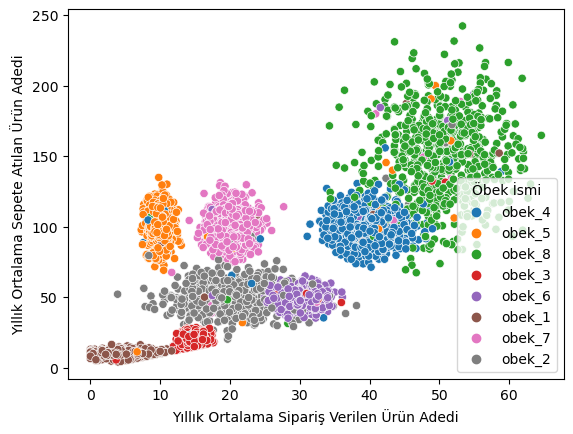

In [4]:
sns.scatterplot(x="Yıllık Ortalama Sipariş Verilen Ürün Adedi",y="Yıllık Ortalama Sepete Atılan Ürün Adedi",data=train_df, hue="Öbek İsmi")

## Drop other columns

In [5]:
x_df = train_df.drop(["Cinsiyet", "Yaş Grubu", "Medeni Durum", "İstihdam Durumu", "Yaşadığı Şehir", "En Çok İlgilendiği Ürün Grubu", "Eğitim Düzeyi", "Eğitime Devam Etme Durumu"], axis=1)

df_2 = x_df.drop(["index", "Yıllık Ortalama Gelir", "Yıllık Ortalama Satın Alım Miktarı"], axis=1)

df_4 = df_2[df_2["Öbek İsmi"] == "obek_2"]
df_4 = df_4.drop(["Öbek İsmi"], axis=1)
df_4

,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi
67,8.680043,50.776121
70,14.399716,46.937575
77,20.764440,39.410609
82,10.664512,48.035163
96,24.568341,67.269806
...,...,...
5404,14.636095,63.137571
5406,14.141637,33.675721
5420,18.822320,49.406367
5429,27.638815,69.673309


## Isolation Forest - Anomaly Detection

In [6]:
from sklearn.ensemble import IsolationForest

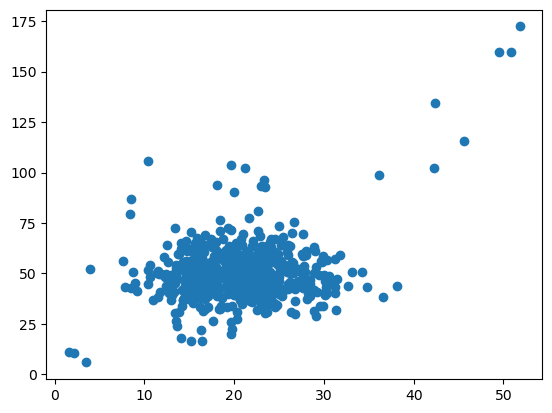

In [7]:
plt.scatter(df_4.iloc[:,0], df_4.iloc[:,1])

In [8]:
clf = IsolationForest(contamination=0.0475)
clf.fit(df_4)
predictions = clf.predict(df_4)
predictions

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [9]:
index = np.where(predictions < 0)
index

(array([ 40,  45,  61,  62,  71,  80, 133, 159, 187, 195, 267, 290, 302,
        319, 341, 342, 359, 392, 411, 418, 423, 444, 485, 495, 538, 540]),)

In [10]:
x=df_4.values

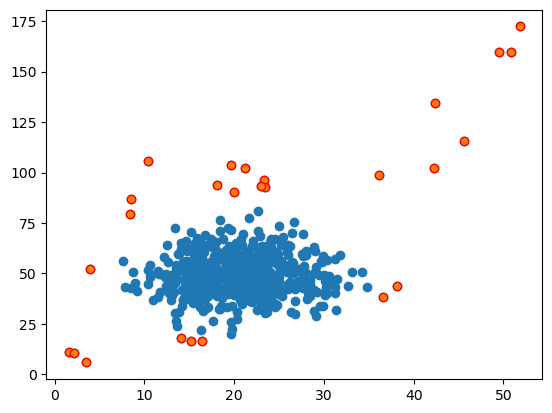

In [11]:
plt.scatter(df_4.iloc[:,0], df_4.iloc[:,1])
plt.scatter(x[index,0],x[index,1], edgecolors="r")

## Delete rows with given indexes

In [12]:
index = np.where(predictions < 0)

df_4["index"] = range(df_4.shape[0])
df_4.shape[0]
df_4

for i, row in df_4.iterrows():
    if (row["index"] == index).any():
        print(row["index"])
        df_4.drop(i, inplace=True)
df_4

40.0
45.0
61.0
62.0
71.0
80.0
133.0
159.0
187.0
195.0
267.0
290.0
302.0
319.0
341.0
342.0
359.0
392.0
411.0
418.0
423.0
444.0
485.0
495.0
538.0
540.0


,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,index
67,8.680043,50.776121,0
70,14.399716,46.937575,1
77,20.764440,39.410609,2
82,10.664512,48.035163,3
96,24.568341,67.269806,4
...,...,...,...
5404,14.636095,63.137571,542
5406,14.141637,33.675721,543
5420,18.822320,49.406367,544
5429,27.638815,69.673309,545


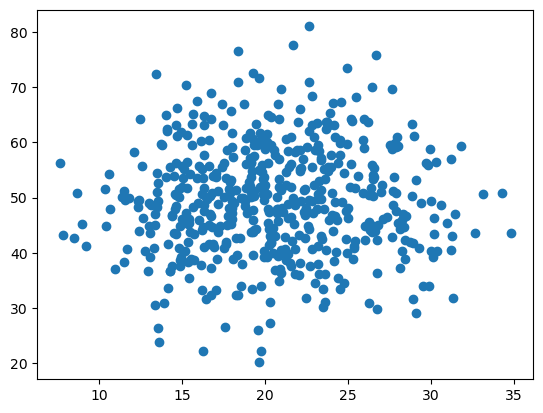

In [13]:
plt.scatter(df_4.iloc[:,0], df_4.iloc[:,1])